# ISA343 Final Project

## 1. Loading and Viewing the Data

In [0]:
import pandas as pd

# Read in data and display first 5 rows
hc_data = pd.read_csv("/dbfs/FileStore/shared_uploads/mfinkle@bryant.edu/hc_data-2.csv")
hc_data.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [0]:
# get the shape the dataframe
print('The shape of our features is:', hc_data.shape)

The shape of our features is: (318438, 18)

## 2. EDA

In [0]:
# descriptive statistics for each column
hc_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


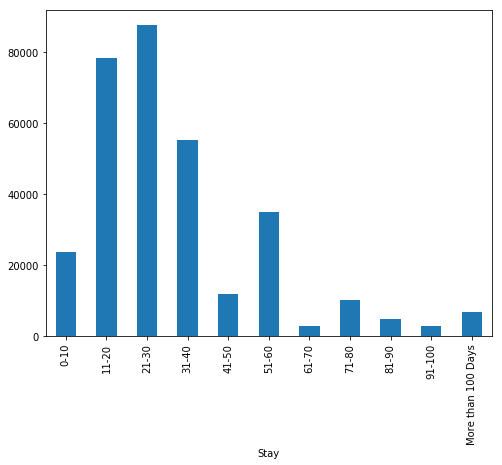

In [0]:
import matplotlib.pyplot as plt

# identifying target variable distribution
fig = plt.figure(figsize=(8,6))
hc_data.groupby('Stay').case_id.count().plot.bar(ylim=0)

plt.show()

In [0]:
# checking for missing values
hc_data.isnull().sum()

Out[29]: case_id 0
Hospital_code 0
Hospital_type_code 0
City_Code_Hospital 0
Hospital_region_code 0
Available Extra Rooms in Hospital 0
Department 0
Ward_Type 0
Ward_Facility_Code 0
Bed Grade 113
patientid 0
City_Code_Patient 4532
Type of Admission 0
Severity of Illness 0
Visitors with Patient 0
Age 0
Admission_Deposit 0
Stay 0
dtype: int64

In [0]:
# replacing empty spaces in column names with underscores
hc_data.columns = hc_data.columns.str.replace(' ', '_')

hc_data.head(1)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10


## 3. Numerical Data Cleaning

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np

# imputing missing values
hc_data_1 = hc_data
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
hc_data_1.City_Code_Patient = imputer.fit_transform(hc_data_1['City_Code_Patient'].values.reshape(-1,1))[:,0]
hc_data_1.Bed_Grade = imputer.fit_transform(hc_data_1['Bed_Grade'].values.reshape(-1,1))[:,0]

In [0]:
# checking for missing values
hc_data_1.isnull().sum()

Out[32]: case_id 0
Hospital_code 0
Hospital_type_code 0
City_Code_Hospital 0
Hospital_region_code 0
Available_Extra_Rooms_in_Hospital 0
Department 0
Ward_Type 0
Ward_Facility_Code 0
Bed_Grade 0
patientid 0
City_Code_Patient 0
Type_of_Admission 0
Severity_of_Illness 0
Visitors_with_Patient 0
Age 0
Admission_Deposit 0
Stay 0
dtype: int64

In [0]:
# factorizing the target column
hc_data_2 = hc_data_1
factor = pd.factorize(hc_data_2['Stay'])
hc_data_2.Stay = factor[0] + 1
definitions = factor[1]
print(hc_data_2.Stay.head())
print(definitions)

0 1
1 2
2 3
3 2
4 2
Name: Stay, dtype: int64
Index(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
 'More than 100 Days', '81-90', '61-70', '91-100'],
 dtype='object')

## 4. Categorical Data Cleaning

In [0]:
# create list with only categorical columns
cols = hc_data_2.columns
num_cols = hc_data_2._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

print(cat_cols)

['Ward_Facility_Code', 'Severity_of_Illness', 'Age', 'Hospital_region_code', 'Type_of_Admission', 'Hospital_type_code', 'Ward_Type', 'Department']

In [0]:
# One-hot encode the data
hc_data_3 = pd.get_dummies(hc_data_2, prefix = cat_cols)

# Display the first 5 rows
hc_data_3.head()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit,Stay,Ward_Facility_Code_a,Ward_Facility_Code_b,Ward_Facility_Code_c,Ward_Facility_Code_d,Ward_Facility_Code_e,Ward_Facility_Code_f,Ward_Facility_Code_g,Severity_of_Illness_X,Severity_of_Illness_Y,Severity_of_Illness_Z,Age_TB & Chest disease,Age_anesthesia,Age_gynecology,Age_radiotherapy,Age_surgery,Hospital_region_code_P,Hospital_region_code_Q,Hospital_region_code_R,Hospital_region_code_S,Hospital_region_code_T,Hospital_region_code_U,Type_of_Admission_A,Type_of_Admission_B,Type_of_Admission_C,Type_of_Admission_D,Type_of_Admission_E,Type_of_Admission_F,Hospital_type_code_Emergency,Hospital_type_code_Trauma,Hospital_type_code_Urgent,Ward_Type_Extreme,Ward_Type_Minor,Ward_Type_Moderate,Department_0-10,Department_11-20,Department_21-30,Department_31-40,Department_41-50,Department_51-60,Department_61-70,Department_71-80,Department_81-90,Department_91-100
0,1,8,3,3,2.0,31397,7.0,2,4911.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,2,2,5,2,2.0,31397,7.0,2,5954.0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3,10,1,2,2.0,31397,7.0,2,4745.0,3,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,4,26,2,2,2.0,31397,7.0,2,7272.0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,5,26,2,2,2.0,31397,7.0,2,5558.0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## 5. Feature Preperation for Modeling

In [0]:
# Labels are the values we want to predict
labels = np.array(hc_data_3['Stay'])

# Remove the labels from the features
hc_data_4 = hc_data_3.drop('Stay', axis = 1)

# Saving feature names for later use
feature_list = list(hc_data_4.columns)

# Convert to numpy array
hc_data_5 = np.array(hc_data_4)

In [0]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(hc_data_5, labels, test_size = 0.25, random_state = 42)

In [0]:
# check the shapes of the split data set
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (238828, 52)
Training Labels Shape: (238828,)
Testing Features Shape: (79610, 52)
Testing Labels Shape: (79610,)

## 6. First Model Iteration
- Random Forest Regressor
- Arbitrary model parameters
- Uses all input features

In [0]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# train the model
rf.fit(train_features, train_labels);

## 6a. Evaluate First Model Iteration
- Creates Predictions
- Calculate MAE, MAPE, and Accuracy
- Rank feature importances
- Plot feature importances
- Plot cumulative feature importance to all features with more than zero importance
- Identify how many features contribute to 95% of all the important features

In [0]:
# create predictions
predictions = rf.predict(test_features)

# calculate the absolute errors
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.41 degrees.

In [0]:
# calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 51.0 %.

#### Note: First Model Accuracy: 51.0%

In [0]:
# get numerical feature importances
importances = list(rf.feature_importances_)

feature_importances = [(hc_data_5, round(importance, 2)) for hc_data_5, importance in zip(feature_list, importances)]

# sort the feature importances by descending
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Admission_Deposit Importance: 0.16
Variable: case_id Importance: 0.15
Variable: patientid Importance: 0.15
Variable: Visitors_with_Patient Importance: 0.09
Variable: City_Code_Patient Importance: 0.06
Variable: Hospital_code Importance: 0.05
Variable: Available_Extra_Rooms_in_Hospital Importance: 0.04
Variable: Bed_Grade Importance: 0.03
Variable: City_Code_Hospital Importance: 0.02
Variable: Hospital_region_code_S Importance: 0.02
Variable: Ward_Facility_Code_a Importance: 0.01
Variable: Age_anesthesia Importance: 0.01
Variable: Age_gynecology Importance: 0.01
Variable: Age_radiotherapy Importance: 0.01
Variable: Hospital_region_code_Q Importance: 0.01
Variable: Hospital_region_code_R Importance: 0.01
Variable: Type_of_Admission_F Importance: 0.01
Variable: Hospital_type_code_Trauma Importance: 0.01
Variable: Ward_Type_Extreme Importance: 0.01
Variable: Ward_Type_Minor Importance: 0.01
Variable: Ward_Type_Moderate Importance: 0.01
Variable: Department_11-20 Importance: 0.01
Variable: Department_21-30 Importance: 0.01
Variable: Department_31-40 Importance: 0.01
Variable: Department_41-50 Importance: 0.01
Variable: Department_51-60 Importance: 0.01
Variable: Department_61-70 Importance: 0.01
Variable: Department_71-80 Importance: 0.01
Variable: Department_81-90 Importance: 0.01
Variable: Ward_Facility_Code_b Importance: 0.0
Variable: Ward_Facility_Code_c Importance: 0.0
Variable: Ward_Facility_Code_d Importance: 0.0
Variable: Ward_Facility_Code_e Importance: 0.0
Variable: Ward_Facility_Code_f Importance: 0.0
Variable: Ward_Facility_Code_g Importance: 0.0
Variable: Severity_of_Illness_X Importance: 0.0
Variable: Severity_of_Illness_Y Importance: 0.0
Variable: Severity_of_Illness_Z Importance: 0.0
Variable: Age_TB & Chest disease Importance: 0.0
Variable: Age_surgery Importance: 0.0
Variable: Hospital_region_code_P Importance: 0.0
Variable: Hospital_region_code_T Importance: 0.0
Variable: Hospital_region_code_U Importance: 0.0
Variable: Type_of_Admission_A Importance: 0.0
Variable: Type_of_Admission_B Importance: 0.0
Variable: Type_of_Admission_C Importance: 0.0
Variable: Type_of_Admission_D Importance: 0.0
Variable: Type_of_Admission_E Importance: 0.0
Variable: Hospital_type_code_Emergency Importance: 0.0
Variable: Hospital_type_code_Urgent Importance: 0.0
Variable: Department_0-10 Importance: 0.0
Variable: Department_91-100 Importance: 0.0

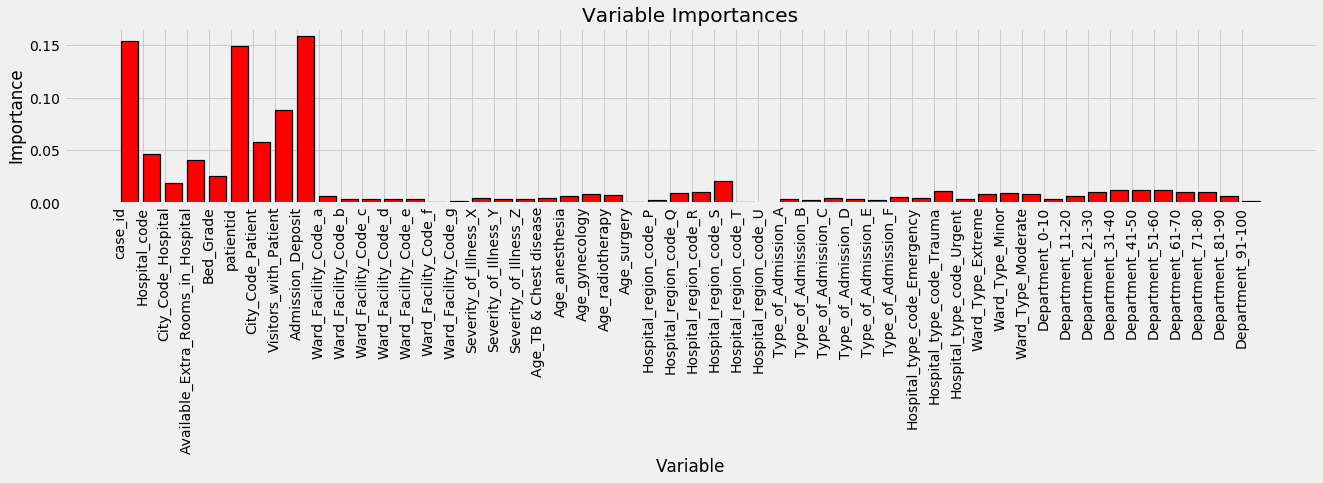

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot variable importance
x_values = list(range(len(importances)))
plt.figure(figsize=(20, 3))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2, align = 'edge')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

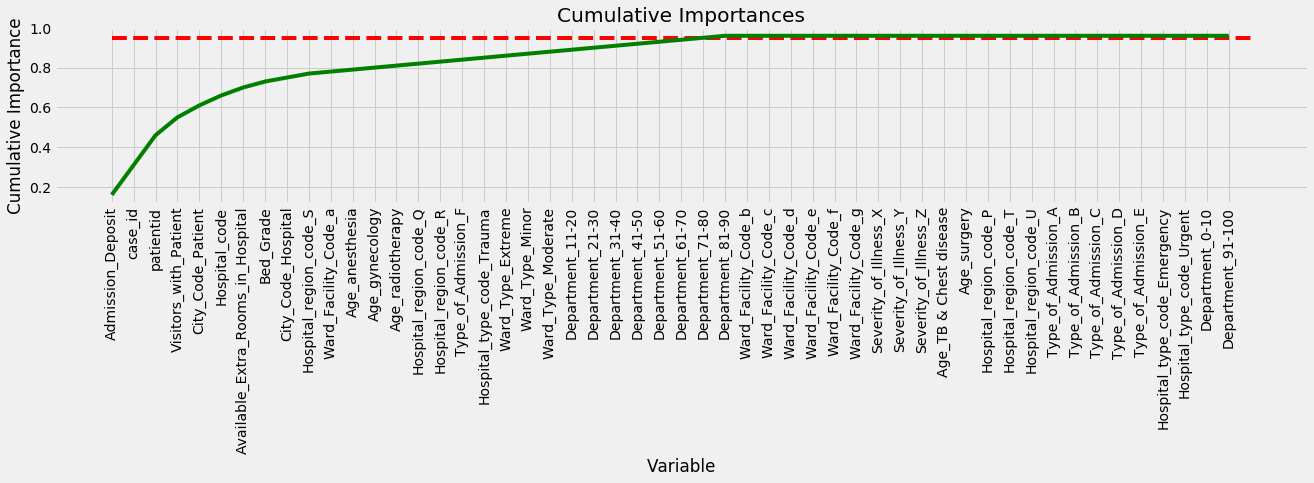

In [0]:
# create a plot showing how each feature contributes to the cumulative importance
plt.figure(figsize=(20, 3))

# list features from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# create a line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [0]:
# find number of features for cumulative importance of 95%
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 96% importance: 29

## 7. Second Model Iteration
- Try retraining the first model using only the most important features

In [0]:
# create new training and testing set with only the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:28]]
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (238828, 28)
Important test features shape: (79610, 28)

In [0]:
# re-train and re-evaluate the model using only the important features
rf.fit(important_train_features, train_labels);

predictions = rf.predict(important_test_features)

# performance metrics
errors = abs(predictions - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)

print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 1.41 degrees.
Accuracy: 50.5 %.

#### Note: Second Model Accuracy 50.5%

## 8. Third Model Iteration
- Using what was discovered in the evaluation of the first and second model, tune the parameters with grid search

In [0]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 55, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 30, 50]}

In [0]:
# Use the random grid to search for best hyperparameters
rf_cv = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = random_grid, n_iter = 25, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 25 tasks | elapsed: 2.1min
[Parallel(n_jobs=-1)]: Done 75 out of 75 | elapsed: 13.1min finished
Out[130]: RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=25,
 n_jobs=-1,
 param_distributions={'bootstrap': [True, False],
 'max_depth': [10, 55, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 30, 50]},
 random_state=42, verbose=2)

## 8a. Evaluate Third Model Iteration
- Save the Model
- View best parameters from the gird search
- calulate average error and accuracy

In [0]:
import joblib

# save the model
filename = 'rf_random_model.sav'
joblib.dump(rf_random, filename)

Out[131]: ['rf_random_model.sav']

In [0]:
# load the model
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

In [0]:
# view best parameters
rf_random.best_params_

Out[132]: {'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [0]:
# evaluate the grid search model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [0]:
# calculate the average error and the accuracy
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

#### Note: Third Model Accuracy 53%

## 9. Balance the Data
- Used SMOTETomek to over-sample and then under-sample the data to even out target variable distribution
- Compared original training set size with the new balanced training set size

In [0]:
# create class count
hc_data_6 = hc_data_3

target_count = hc_data_6.Stay.value_counts()
print('Class 0:', target_count[1])
print('Class 1:', target_count[2])
print('Class 2:', target_count[3])
print('Class 3:', target_count[4])
print('Class 4:', target_count[5])
print('Class 5:', target_count[6])
print('Class 6:', target_count[7])
print('Class 7:', target_count[8])
print('Class 8:', target_count[9])
print('Class 9:', target_count[10])
print('Class 10:', target_count[11])

Class 0: 23604
Class 1: 11743
Class 2: 55159
Class 3: 78139
Class 4: 35018
Class 5: 87491
Class 6: 10254
Class 7: 6683
Class 8: 4838
Class 9: 2744
Class 10: 2765

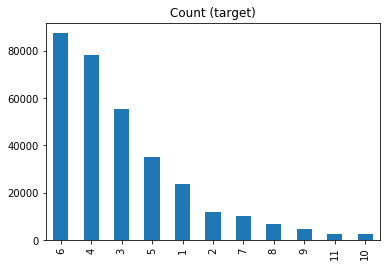

In [0]:
# plot target count descending
target_count.plot(kind='bar', title='Count (target)');

In [0]:
# Remove target column
X = hc_data_6.drop('Stay', axis = 1)
y = hc_data_6['Stay']

# split test and train datasets again into new dataframes aas to not override the old ones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
# class count storage in variables
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4, count_class_5, count_class_6, count_class_7, count_class_8, count_class_9, count_class_10 = hc_data_6.Stay.value_counts()

In [0]:
# divide dataframe by class
df_class_0 = hc_data_6[hc_data_6['Stay'] == 0]
df_class_1 = hc_data_6[hc_data_6['Stay'] == 1]
df_class_2 = hc_data_6[hc_data_6['Stay'] == 2]
df_class_3 = hc_data_6[hc_data_6['Stay'] == 3]
df_class_4 = hc_data_6[hc_data_6['Stay'] == 4]
df_class_5 = hc_data_6[hc_data_6['Stay'] == 5]
df_class_6 = hc_data_6[hc_data_6['Stay'] == 6]
df_class_7 = hc_data_6[hc_data_6['Stay'] == 7]
df_class_8 = hc_data_6[hc_data_6['Stay'] == 8]
df_class_9 = hc_data_6[hc_data_6['Stay'] == 9]
df_class_10 = hc_data_6[hc_data_6['Stay'] == 10]

In [0]:
from imblearn.combine import SMOTETomek

# instantiate and fit the SMOTETomek data re-sampling function
smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

print(f'X_smt Shape: {X_smt.shape}')
print(f'X Shape: {X.shape}')

X_smt Shape: (807651, 52)
X Shape: (318438, 52)

## 10. Fourth Model Iteration
- Re-train the Random Forest Regressor Grid Search CV Model with Balanced Dataset

In [0]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
rf_cv_bal = RandomForestRegressor()

rf_random_bal = RandomizedSearchCV(estimator = rf_cv_bal, param_distributions = random_grid, n_iter = 25, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

rf_random_bal.fit(X_smt, y_smt)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 25 tasks | elapsed: 8.9min
[Parallel(n_jobs=-1)]: Done 75 out of 75 | elapsed: 50.5min finished
Out[85]: RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=25,
 n_jobs=-1,
 param_distributions={'bootstrap': [True, False],
 'max_depth': [10, 55, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 30, 50]},
 random_state=42, verbose=2)

## 10a. Evaluate Fourth Model Iteration
- View best parameters from the gird search
- calulate average error and accuracy

In [0]:
# calculate the average error and accuracy
best_random_bal = rf_random_bal.best_estimator_
random_accuracy_bal = evaluate(best_random_bal, X_test, y_test)

Model Performance
Average Error: 0.7859 degrees.
Accuracy = 73.39%.

In [0]:
# view best parameters
rf_random_bal.best_params_

Out[87]: {'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 55,
 'bootstrap': True}

#### Note: Fourth Model Accuracy 73.39%